In [329]:
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import _thread
from tweepy.auth import OAuthHandler
import timeit
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [330]:
consumer_key = 'xxx'
consumer_secret = 'xxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

## Data Gathering

In [331]:
## Read data from twitter-archive-enhanced.csv 
## write tweet_json.txt from the api

df_1 = pd.read_csv("twitter-archive-enhanced.csv")

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
## Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)
## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timeit.timeit()
## Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    ## This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timeit.timeit()

In [332]:
## Source 1
## Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame 

jasondf = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        jasondf = jasondf.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', \
                                                 'favorite_count']))
jasondf = jasondf.reset_index(drop=True)

In [333]:
## Source 2
## Download image-predictions.tsv from the url 

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url, allow_redirects=True)
print(r.url.split("/")[-1])
filename = r.url.split("/")[-1]
open(filename, 'wb').write(r.content)
print(filename)

image-predictions.tsv
image-predictions.tsv


In [334]:
## create the image_prediction dataframe from image-predictions.tsv

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [605]:
## Source 3
## create twitter-archive-enhanced dataframe from twitter-archive-enhanced.csv
tae = pd.read_csv('twitter-archive-enhanced.csv')

## Assessment
### Visual assessment

In [606]:
tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [607]:
jasondf

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7444,35279
1,892177421306343426,5530,30525
2,891815181378084864,3652,22956
3,891689557279858688,7615,38565
4,891327558926688256,8202,36840
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,123,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


In [608]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Data Wrangling
### Analyse data type,size,null,duplicates,unique etc for all 3 sources

### Analyze tae dataframe created from twitter-archive-enhanced.csv

In [609]:
tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [610]:
#Comment: tae has few retweeted records
#         rating numerator,denominator min are zero. Zero denominator can be an issue for ratings

In [611]:
tae.head(10) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [612]:
 tae.tail()                      

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [613]:
#Comment head and tail show 
# NaN in in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
# Name has None,a values
# Some rows have none in all 4 doggo floofer pupper puppo columns.


In [614]:
tae.sample()   

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1922,674255168825880576,NaN,NaN,2015-12-08 15:52:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobbay. He's a marshmallow wizard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674255168...,10,10,Bobbay,None,None,None,None


In [615]:
tae.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [616]:
#Comment in_reply_to_status_id , in_reply_to_user_id ,retweeted_status_id,retweeted_status_user_id  are float64
# timestamp is object

In [617]:
tae.tweet_id.value_counts(ascending=False)

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [618]:
tae.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [619]:
tae.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Philippe      1
Vinnie        1
Margo         1
Lili          1
Georgie       1
Name: name, Length: 957, dtype: int64

In [620]:
#comment 745 none and 55 a 

In [621]:
tae.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [622]:
# find the minimum denominator
tae[tae["rating_denominator"]==tae["rating_denominator"].min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [623]:
# find the max denominator
tae[tae["rating_denominator"]==tae["rating_denominator"].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [624]:
# find the min numerator
tae[tae["rating_numerator"]==tae["rating_numerator"].min()]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [625]:
#comment 2 records with 0 ratings numerator

In [626]:
# find the max numerator
tae[tae["rating_numerator"]==tae["rating_numerator"].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [627]:
#Comment 1776 is highest ratings numerator

In [628]:
tae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [629]:
tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [630]:
tae.timestamp.unique()

array(['2017-08-01 16:23:56 +0000', '2017-08-01 00:17:27 +0000',
       '2017-07-31 00:18:03 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'],
      dtype=object)

In [631]:
tae.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [632]:
tae.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [633]:
tae.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [634]:
tae.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [635]:
tae.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [636]:
tae.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [637]:
#Comment majority of records have none value in doggo , floofer , pupper, puppo 

In [638]:
tae.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [639]:
tae.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [640]:
tae.isnull().values.any()

True

In [641]:
tae.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [642]:
#comment in_reply_to_status_id in_reply_to_user_id retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp
# expanded_urls contain nulls

## Investigate image_prediction.tsv

In [645]:
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [646]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [647]:
#comment p1_conf > p2_conf > p3_conf

In [735]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [649]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [650]:
image_prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1974,869772420881756160,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,1,Pembroke,0.980148,True,Cardigan,0.019271,True,malamute,0.000136,True


In [651]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [652]:
image_prediction[image_prediction["img_num"]==image_prediction["img_num"].max()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


# Investigate jason df

In [653]:
jasondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


In [654]:
#Comment tweet_id retweet_count favorite_count are object

In [655]:
jasondf.astype(int).describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2613.508366,7371.110253
std,6.823170e+16,4422.181442,11447.470931
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,529.500000,1281.000000
50%,7.182469e+17,1220.000000,3200.000000
75%,7.986692e+17,3035.000000,9019.500000
max,8.924206e+17,75108.000000,151999.000000


In [656]:
#comment astype(int) is used to get descriptive statistcs of jasondf

In [657]:
jasondf.describe

<bound method NDFrame.describe of                 tweet_id retweet_count favorite_count
0     892420643555336193          7444          35279
1     892177421306343426          5530          30525
2     891815181378084864          3652          22956
3     891689557279858688          7615          38565
4     891327558926688256          8202          36840
...                  ...           ...            ...
2326  666049248165822465            39             95
2327  666044226329800704           123            263
2328  666033412701032449            39            108
2329  666029285002620928            41            118
2330  666020888022790149           444           2352

[2331 rows x 3 columns]>

In [658]:
jasondf.tail()

,tweet_id,retweet_count,favorite_count
2326,666049248165822465,39,95
2327,666044226329800704,123,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118
2330,666020888022790149,444,2352


### Issues noted during visual and programmatic assessment is done by opening the twitter_archive_enhanced.csv in google sheets

## Quality Issue in twitter_archive_enhanced.csv 
#### Issue 1. Retweet id is present for many rows
#### Issue 2. Ratings are accessed by programmatic addition of column ratings and fixing the rows with 0 denominator values
#### Issue 3. 181 are retweet 
#### Issue 4. in_reply_to_status_id  is float and has nulls
#### Issue 5. in_reply_to_user_id is float and has nulls
#### Issue 6. retweeted_status_id,retweeted_status_user_id are not needed for analysis.
#### Issue 7. Names with value 'None' or 'a' 
#### Issue 8. tweet_id is defined as object and int64
#### Issue 9. timestamp is object
#### Issue 10 expanded_url is null
##  Quality Issue in jason 
#### Issue 11. tweet_id, retweet_count & favorite_count are object.

## Tidyness issues
#### Issue 12. Columns doggo ,floofer, pupper, puppo need to be under one column heading DoggoLingo
#### Issue 13. Column retweet_count , favorite_count of jtweet_jason_df need to be with columns of twitter_archive_enhanced.csv as it makes more relevance along with other variables
#### Issue 14. Image and highest prediction need to be with columns of twitter_archive_enhanced.csv as it makes more relevance along with other variables


## Copy original data before cleaning

In [659]:
tae_clean = tae.copy()
jason_clean = jasondf.copy()
image_prediction_clean = image_prediction.copy()

## Clean


#### Define
#### Issue 1. Retweet id is present for many rows
#### Code
#### Drop rows with retweetd_status_id <> 0


In [660]:
#Drop rows with retweetd_status_id <> 0 because we don't want to consider retweet in analysis
tae_clean.drop(tae_clean[tae_clean.retweeted_status_id.notnull()].index,inplace=True)

#### Test

In [661]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define
#### Issue 3. 181 are retweet
#### Issue 6. retweeted_status_id,retweeted_status_user_id are not needed for analysis.
#### Code
#### Drop columns with retweeted_status_id ,retweeted_status_user_id,retweeted_status_timestamp


In [662]:
#Drop retweet columns as we are not considering retweet in analysis
tae_clean.drop('retweeted_status_id',axis = 'columns',inplace = True)
tae_clean.drop('retweeted_status_user_id',axis = 'columns',inplace = True)
tae_clean.drop('retweeted_status_timestamp',axis = 'columns',inplace = True)

#### Test

In [663]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

#### Define
#### Issue 4. in_reply_to_status_id is float and has nulls
#### Code
#### Remove null from 'in_reply_to_user_id' and convert to int


In [664]:
# Remove null from 'in_reply_to_user_id' and convert to int
tae_clean['in_reply_to_user_id'] = tae_clean['in_reply_to_user_id'].fillna(0)
tae_clean['in_reply_to_user_id'] = tae_clean['in_reply_to_user_id'].astype(int)

#### Test

In [665]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    2175 non-null   int64  
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 254.9+ 

#### Define
#### Issue 5.  in_reply_to_status_id is float and has nulls
#### Code
#### Remove null from 'in_reply_to_user_id' and convert to int

In [666]:
# Remove null from 'in_reply_to_status_id' and convert to int
tae_clean['in_reply_to_status_id'] = tae_clean['in_reply_to_status_id'].fillna(0)
tae_clean['in_reply_to_status_id'] = tae_clean['in_reply_to_status_id'].astype(int)


#### Test

In [667]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2175 non-null   int64 
 1   in_reply_to_status_id  2175 non-null   int64 
 2   in_reply_to_user_id    2175 non-null   int64 
 3   timestamp              2175 non-null   object
 4   source                 2175 non-null   object
 5   text                   2175 non-null   object
 6   expanded_urls          2117 non-null   object
 7   rating_numerator       2175 non-null   int64 
 8   rating_denominator     2175 non-null   int64 
 9   name                   2175 non-null   object
 10  doggo                  2175 non-null   object
 11  floofer                2175 non-null   object
 12  pupper                 2175 non-null   object
 13  puppo                  2175 non-null   object
dtypes: int64(5), object(9)
memory usage: 254.9+ KB


#### Define
#### Issue 10. expanded_urls has nulls
#### Code
#### Remove null from 'expanded_urls

In [668]:
tae_clean['expanded_urls']=tae_clean['expanded_urls'].fillna('')

#### Test

In [669]:
# Test
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2175 non-null   int64 
 1   in_reply_to_status_id  2175 non-null   int64 
 2   in_reply_to_user_id    2175 non-null   int64 
 3   timestamp              2175 non-null   object
 4   source                 2175 non-null   object
 5   text                   2175 non-null   object
 6   expanded_urls          2175 non-null   object
 7   rating_numerator       2175 non-null   int64 
 8   rating_denominator     2175 non-null   int64 
 9   name                   2175 non-null   object
 10  doggo                  2175 non-null   object
 11  floofer                2175 non-null   object
 12  pupper                 2175 non-null   object
 13  puppo                  2175 non-null   object
dtypes: int64(5), object(9)
memory usage: 254.9+ KB


In [670]:
tae_clean.isna().sum()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
doggo                    0
floofer                  0
pupper                   0
puppo                    0
dtype: int64

#### Define
#### Issue 9. timestamp is object
#### Code
#### Convert timestamp from object to datetime

In [671]:
#Convert timestamp from object to datetime

tae_clean['timestamp'] = pd.to_datetime(tae_clean.timestamp)

#### Test

In [672]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2175 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### Define
#### Issue 7. Names with value 'None' or 'a' 
#### Code 
#### change name = none,a to nonamedogs

In [674]:
#change name = none and a to NoNameDogs
tae_clean.loc[(tae_clean.name == 'None'),'name']='NoNameDogs'
tae_clean.loc[(tae_clean.name == 'a'),'name']='NoNameDogs'

#### Test

In [675]:
tae_clean.name.value_counts()

NoNameDogs    735
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Darby           1
Brady           1
Eugene          1
Dewey           1
Duddles         1
Name: name, Length: 955, dtype: int64

In [676]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   int64              
 2   in_reply_to_user_id    2175 non-null   int64              
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2175 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [677]:
tae_clean.name.value_counts()

NoNameDogs    735
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Darby           1
Brady           1
Eugene          1
Dewey           1
Duddles         1
Name: name, Length: 955, dtype: int64

#### Define
#### Issue 2. Ratings are accessed by programmatic addition of column ratings and fixing the rows with 0 denominator values
#### Code 
#### Drop Rating denominator min = 0 and numerator min = 0 
#### Calculate ratings rounded

In [678]:
# Drop Rating denominator min = 0 and numerator min = 0 
tae_clean.drop(tae_clean[tae_clean['rating_denominator']==0].index, inplace = True)
tae_clean.drop(tae_clean[tae_clean['rating_numerator']==0].index, inplace = True)

In [679]:
# Calculate and Round the ratings

tae_clean['ratings_round'] = tae_clean["rating_numerator"] / tae_clean["rating_denominator"]
tae_clean['ratings_round']= np.round(tae_clean['ratings_round'], decimals=1)

#### Test

In [680]:
tae_clean['ratings_round'].value_counts()

1.2      505
1.0      444
1.1      431
1.3      307
0.9      156
0.8       99
0.7       54
1.4       43
0.5       37
0.6       33
0.3       19
0.4       15
0.2       11
0.1        7
42.0       2
66.6       1
1.5        1
7.5        1
2.6        1
3.4        1
18.2       1
2.7        1
1.7        1
177.6      1
Name: ratings_round, dtype: int64

In [681]:
tae_clean[['rating_numerator','rating_denominator','ratings_round']]

,rating_numerator,rating_denominator,ratings_round
0,13,10,1.3
1,13,10,1.3
2,12,10,1.2
3,13,10,1.3
4,12,10,1.2
...,...,...,...
2351,5,10,0.5
2352,6,10,0.6
2353,9,10,0.9
2354,7,10,0.7


#### Define
#### Issue 12. Columns doggo ,floofer, pupper, puppo need to be under one column heading DoggoLingo
#### Code 
#### replace null,none,nan
#### combine all 4 columns into new column dog_stages
#### Add space in combined values
#### Drop columns doggo ,floofer, pupper, puppo

In [682]:
# Tidy the columns doggo,floofer,pupper,puppo

tae_clean.doggo.replace('None', '', inplace=True)
tae_clean.doggo.replace(np.NaN, '', inplace=True)
tae_clean.floofer.replace('None', '', inplace=True)
tae_clean.floofer.replace(np.NaN, '', inplace=True)
tae_clean.pupper.replace('None', '', inplace=True)
tae_clean.pupper.replace(np.NaN, '', inplace=True)
tae_clean.puppo.replace('None', '', inplace=True)
tae_clean.puppo.replace(np.NaN, '', inplace=True)

In [683]:
tae_clean.doggo.value_counts()

         2085
doggo      87
Name: doggo, dtype: int64

In [684]:
tae_clean.floofer.value_counts()

           2162
floofer      10
Name: floofer, dtype: int64

In [685]:
tae_clean['dog_stages'] = tae_clean['doggo'] + tae_clean['floofer'] + tae_clean['pupper'] + tae_clean['puppo']

In [686]:
tae_clean.dog_stages.replace('None', '', inplace=True)
tae_clean.dog_stages.replace(np.NaN, '', inplace=True)

In [687]:
tae_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2351,NaN
2352,NaN
2353,NaN
2354,NaN


In [688]:
tae_clean.loc[(tae_clean.dog_stages == 'doggopupper') ,'dog_stages' ] = 'doggo, pupper'
tae_clean.loc[(tae_clean.dog_stages == 'doggofloofer') ,'dog_stages' ] = 'doggo, floofer'
tae_clean.loc[(tae_clean.dog_stages == 'doggopuppo') ,'dog_stages' ] = 'doggo, puppo'

In [689]:
tae_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [690]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2172 non-null   int64              
 1   in_reply_to_status_id  2172 non-null   int64              
 2   in_reply_to_user_id    2172 non-null   int64              
 3   timestamp              2172 non-null   datetime64[ns, UTC]
 4   source                 2172 non-null   object             
 5   text                   2172 non-null   object             
 6   expanded_urls          2172 non-null   object             
 7   rating_numerator       2172 non-null   int64              
 8   rating_denominator     2172 non-null   int64              
 9   name                   2172 non-null   object             
 10  ratings_round          2172 non-null   float64            
 11  dog_stages             2172 non-null   object           

In [691]:
tae_clean.dog_stages.value_counts()

                  1828
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

In [692]:
tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,ratings_round,dog_stages
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,


#### Save the clean dataframe

In [693]:
# save the clean dataframe

tae_clean.to_csv('twitter_archieved_enhanced_v1.csv', index=False)

#### Define
#### Issue 11. tweet id, retweet_count & favorite_count are object in jason.
#### Code 
#### Convert to int

In [694]:
# fix the data type of jason columns
jason_clean['tweet_id'] = jason_clean['tweet_id'].astype(int)
jason_clean['retweet_count'] = jason_clean['retweet_count'].astype(int)
jason_clean['favorite_count'] = jason_clean['favorite_count'].astype(int)

#### Test

In [695]:
jason_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


#### Define
#### Issue 13. Column retweet_count , favorite_count of jtweet_jason_df need to be with columns of twitter_archive_enhanced.csv as it makes more relevance along with other variables
#### Code 
#### Merge tae and jasondf on tweet_id

In [696]:
#Code merge Column retweet_count , favorite_count of jasondf with twitter_archive_enhanced on tweet_id
#as it makes more relevance along with other variables
tae_merge = pd.merge(tae_clean,jason_clean,
                 left_on='tweet_id',right_on='tweet_id')

#### Test

In [697]:
tae_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2164
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2165 non-null   int64              
 1   in_reply_to_status_id  2165 non-null   int64              
 2   in_reply_to_user_id    2165 non-null   int64              
 3   timestamp              2165 non-null   datetime64[ns, UTC]
 4   source                 2165 non-null   object             
 5   text                   2165 non-null   object             
 6   expanded_urls          2165 non-null   object             
 7   rating_numerator       2165 non-null   int64              
 8   rating_denominator     2165 non-null   int64              
 9   name                   2165 non-null   object             
 10  ratings_round          2165 non-null   float64            
 11  dog_stages             2165 non-null   object           

#### Define
#### Issue 14. Image and highest prediction need to be with columns of twitter_archive_enhanced.csv as it makes more relevance along with other variables
#### Code 
#### Merge tweet_id,jpg_url,p1 on tweet_id 

In [698]:
#join image_prediction with tae_merge for image_url and p1 as it makes more sense to combine highest prediction value
tae_image_merge = pd.merge(tae_merge,image_prediction_clean[['tweet_id','jpg_url','p1']],on='tweet_id', how='left')

#### Test

In [699]:
tae_image_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2164
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2165 non-null   int64              
 1   in_reply_to_status_id  2165 non-null   int64              
 2   in_reply_to_user_id    2165 non-null   int64              
 3   timestamp              2165 non-null   datetime64[ns, UTC]
 4   source                 2165 non-null   object             
 5   text                   2165 non-null   object             
 6   expanded_urls          2165 non-null   object             
 7   rating_numerator       2165 non-null   int64              
 8   rating_denominator     2165 non-null   int64              
 9   name                   2165 non-null   object             
 10  ratings_round          2165 non-null   float64            
 11  dog_stages             2165 non-null   object           

In [700]:
tae_image_merge['name'].value_counts()

NoNameDogs    732
Oliver         10
Charlie        10
Lucy           10
Cooper         10
             ... 
Darby           1
Brady           1
Eugene          1
Dewey           1
Duddles         1
Name: name, Length: 953, dtype: int64

In [701]:
tae_image_merge['dog_stages'].value_counts()

                  1822
pupper             224
doggo               74
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

In [702]:
tae_image_merge.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,ratings_round,dog_stages,retweet_count,favorite_count,jpg_url,p1
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,,7444,35279,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,,5530,30525,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,,3652,22956,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,,7615,38565,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,,8202,36840,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
5,891087950875897856,0,0,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NoNameDogs,1.3,,2752,18574,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever
6,890971913173991426,0,0,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1.3,,1780,10798,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller
7,890729181411237888,0,0,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NoNameDogs,1.3,,16642,59432,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian
8,890609185150312448,0,0,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,1.3,,3801,25559,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier
9,890240255349198849,0,0,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1.4,doggo,6450,29164,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke


In [703]:
tae_image_merge.dog_stages.isnull().sum()

0

In [704]:
tae_image_merge.in_reply_to_status_id.value_counts()

0                     2089
667152164079423488       2
847606175596138496       1
826598365270007808       1
823326389336244224       1
                      ... 
690341253549002752       1
692417313023332352       1
675845657354215424       1
704485744639909888       1
838145498691194880       1
Name: in_reply_to_status_id, Length: 76, dtype: int64

In [705]:
tae_image_merge.dog_stages.isna().sum()

0

#### Exploratory Data Analysis

###### Create an edited CSV from cleaned data and recreate the dataframe¶

In [706]:
tae_image_merge.to_csv('twitter_archive_master.csv', index=False)

In [707]:
df = pd.read_csv('twitter_archive_master.csv')

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2165 non-null   int64  
 1   in_reply_to_status_id  2165 non-null   int64  
 2   in_reply_to_user_id    2165 non-null   int64  
 3   timestamp              2165 non-null   object 
 4   source                 2165 non-null   object 
 5   text                   2165 non-null   object 
 6   expanded_urls          2108 non-null   object 
 7   rating_numerator       2165 non-null   int64  
 8   rating_denominator     2165 non-null   int64  
 9   name                   2165 non-null   object 
 10  ratings_round          2165 non-null   float64
 11  dog_stages             343 non-null    object 
 12  retweet_count          2165 non-null   int64  
 13  favorite_count         2165 non-null   int64  
 14  jpg_url                1985 non-null   object 
 15  p1  

#### Insight 1 :
#### List  dog ratings frequency

In [709]:
df['ratings_round'].value_counts()

1.2      503
1.0      443
1.1      431
1.3      303
0.9      156
0.8       99
0.7       54
1.4       43
0.5       37
0.6       33
0.3       19
0.4       15
0.2       11
0.1        7
42.0       2
66.6       1
1.5        1
7.5        1
2.6        1
3.4        1
18.2       1
2.7        1
1.7        1
177.6      1
Name: ratings_round, dtype: int64

In [710]:
print("Ratings for dogs => {}".format(np.sort(df.ratings_round.astype(int).unique())))

Ratings for dogs => [  0   1   2   3   7  18  42  66 177]


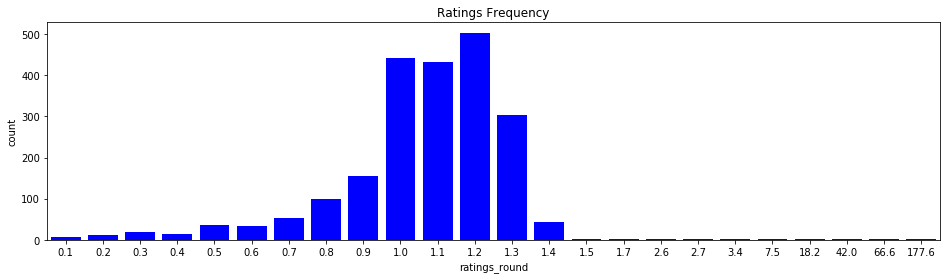

In [711]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16,4))
plt.xticks()
ax = sns.countplot(x=df.ratings_round,color="Blue",saturation=1)
ax.set_title("Ratings Frequency")
plt.show()

In [712]:
#Comment
#Maximum rating 177.6 have frequency 1.
#Lowest rating 0.1 has frequency 7.


#### Insight 2
#### Dog Stages Count
#### Display ratings count by dog stages 

In [713]:
grouped = df.groupby('dog_stages')['ratings_round'].value_counts()
grouped.sort_index(ascending=True)
print(grouped)

dog_stages      ratings_round
doggo           1.1              20
                1.3              20
                1.2              15
                1.0               8
                1.4               8
                0.8               3
doggo, floofer  1.1               1
doggo, pupper   1.2               6
                0.5               1
                1.0               1
                1.1               1
                1.3               1
doggo, puppo    1.3               1
floofer         1.2               3
                1.3               3
                1.1               2
                1.0               1
pupper          1.2              55
                1.0              52
                1.1              52
                1.3              18
                0.9              16
                0.8              12
                0.7               8
                1.4               7
                0.3               1
                0.5               

In [714]:
df.dog_stages.value_counts()

pupper            224
doggo              74
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stages, dtype: int64

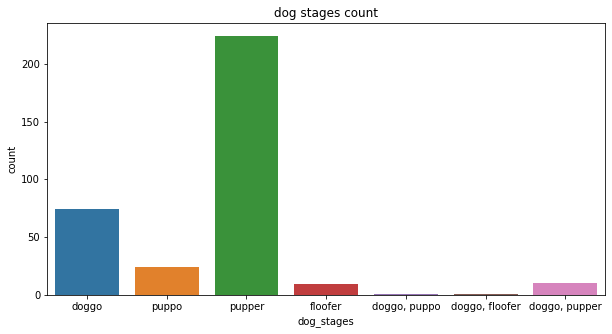

In [715]:
# Plot Dog stages count
plt.figure(figsize=(10,5))
plt.xticks()
ax = sns.countplot(x=df.dog_stages)
ax.set_title('dog stages count')
plt.show()

In [716]:
#Comment
#Pupper is a most occurring stage 226 time. 
#Doggo floofer, doggo puppo occur only once.

#### Insight 3
#### Find the aggregate ratings,favorite count,retweet count in dog stages 

In [717]:
df.groupby('dog_stages').agg({'ratings_round':['max','min','mean']})

ratings_round               
                         max  min      mean
dog_stages                                 
doggo                    1.4  0.8  1.183784
doggo, floofer           1.1  1.1  1.100000
doggo, pupper            1.3  0.5  1.110000
doggo, puppo             1.3  1.3  1.300000
floofer                  1.3  1.0  1.188889
pupper                   2.7  0.3  1.080804
puppo                    1.4  0.9  1.204167

Text(0, 0.5, 'Ratings count')

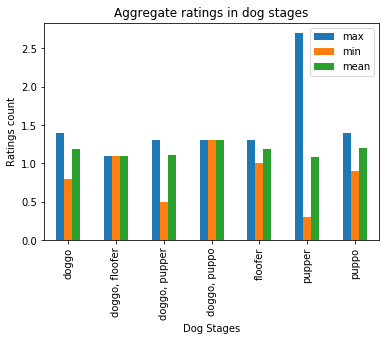

In [718]:
# Plot ratings_round for dog stages
plotdata = df.groupby('dog_stages').agg({'ratings_round':['max','min','mean']})
plotdata.columns = ['max', 'min', 'mean']
plotdata.plot(kind="bar")
plt.title("Aggregate ratings in dog stages")
plt.xlabel("Dog Stages")
plt.ylabel("Ratings count")



In [719]:
#Comment
#doggo has 1.1 rating occurring 20 times
#doggo, floofer has 1.1 rating 1 times
#doggo, pupper has 1.2 rating 6 times
#doggo, puppo has 1.3 rating 1 time              
#floofer has 1.2 ratings 3 times              
#pupper has 1.2 ratings 55 times. 
#puppo has 1.3 ratings 10 times.


In [720]:
df.groupby('dog_stages').agg({'favorite_count':['max','min','mean']})

favorite_count                     
                          max    min          mean
dog_stages                                        
doggo                  151999    682  16422.864865
doggo, floofer          15487  15487  15487.000000
doggo, pupper           51736   4290  12033.600000
doggo, puppo            43495  43495  43495.000000
floofer                 29468   1413   9836.888889
pupper                 113572    229   6463.183036
puppo                  129626   1414  19610.500000

Text(0, 0.5, 'favorite count')

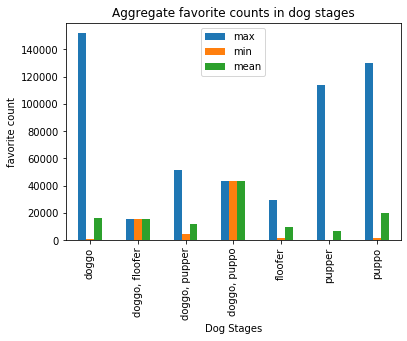

In [721]:
# Plot favorite count for dog stages
plotdata=df.groupby('dog_stages').agg({'favorite_count':['max','min','mean']})
plotdata.columns = ['max', 'min', 'mean']
plotdata.plot(kind="bar")
plt.title("Aggregate favorite counts in dog stages")
plt.xlabel("Dog Stages")
plt.ylabel("favorite count")

In [722]:
df.groupby('dog_stages').agg({'retweet_count':['max','min','mean']})

retweet_count                     
                         max    min          mean
dog_stages                                       
doggo                  75108     27   5606.337838
doggo, floofer          2956   2956   2956.000000
doggo, pupper          16453   1066   3537.200000
doggo, puppo           16882  16882  16882.000000
floofer                15524    421   3518.666667
pupper                 31930     25   2100.799107
puppo                  42268    154   5496.083333

Text(0, 0.5, 'retweet count')

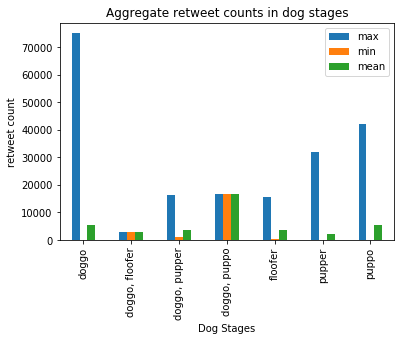

In [723]:
# Plot retweet count for dog stages
plotdata=df.groupby('dog_stages').agg({'retweet_count':['max','min','mean']})
plotdata.columns = ['max', 'min', 'mean']
plotdata.plot(kind="bar")
plt.title("Aggregate retweet counts in dog stages")
plt.xlabel("Dog Stages")
plt.ylabel("retweet count")

In [724]:
#Comment
#Rounded Ratings, favorite count is aggregated for each dog stages. 
#Highest and lowest ratings seen in stage pupper: max of 2.7 and min 0.3
#Stage doggo has max favorite and retweet counts.
#Stage doggo,puppo has similar pattern for favorite and retweet counts


#### Insight 4
#### Analyse dog breeds (p1)
#### Top 10 dog breeds

In [725]:
# Top 10 dog breeds
n=10
df['p1'].value_counts()[:n].to_frame()

,p1
golden_retriever,139
Labrador_retriever,93
Pembroke,88
Chihuahua,79
pug,54
chow,41
Samoyed,39
Pomeranian,38
toy_poodle,37
malamute,29


#### Find total favorite count and retweet count for each breed

In [726]:
p1_agg = df.groupby(['p1']).agg({'favorite_count':'sum','retweet_count':'sum'}).reset_index()
p1_sorted = p1_agg.groupby(['p1']).apply(lambda x: x.sort_values(['favorite_count','retweet_count'],ascending = True)).reset_index(drop = True)
print(p1_agg)

                      p1  favorite_count  retweet_count
0           Afghan_hound           46145          15135
1      African_crocodile             860            226
2           African_grey            4712           1086
3    African_hunting_dog            1536           1018
4               Airedale           56399          14205
..                   ...             ...            ...
368               wombat           27194           9115
369          wood_rabbit            6674           2159
370         wooden_spoon           14459           2900
371                 wool            3337           1206
372                zebra            1347            689

[373 rows x 3 columns]


In [727]:
print(p1_sorted)

                      p1  favorite_count  retweet_count
0           Afghan_hound           46145          15135
1      African_crocodile             860            226
2           African_grey            4712           1086
3    African_hunting_dog            1536           1018
4               Airedale           56399          14205
..                   ...             ...            ...
368               wombat           27194           9115
369          wood_rabbit            6674           2159
370         wooden_spoon           14459           2900
371                 wool            3337           1206
372                zebra            1347            689

[373 rows x 3 columns]


In [728]:
#Display sum of favorite_count and retweet_count for each breed
group4 = p1_sorted.groupby(['p1']).head(1)
group4

,p1,favorite_count,retweet_count
0,Afghan_hound,46145,15135
1,African_crocodile,860,226
2,African_grey,4712,1086
3,African_hunting_dog,1536,1018
4,Airedale,56399,14205
...,...,...,...
368,wombat,27194,9115
369,wood_rabbit,6674,2159
370,wooden_spoon,14459,2900
371,wool,3337,1206


In [729]:
group4[group4['favorite_count']==group4['favorite_count'].max()]

,p1,favorite_count,retweet_count
183,golden_retriever,1542883,432351


In [730]:
group4[group4['retweet_count']==group4['retweet_count'].max()]

,p1,favorite_count,retweet_count
183,golden_retriever,1542883,432351


In [731]:
# golden retriever has most favorite & retweet counts

In [732]:
group4[group4['favorite_count']==group4['favorite_count'].min()]

,p1,favorite_count,retweet_count
160,desktop_computer,94,32


In [733]:
group4[group4['retweet_count']==group4['retweet_count'].min()]

,p1,favorite_count,retweet_count
160,desktop_computer,94,32


In [734]:
#Comment Golden_retriever has highest favorite counts (1543483) and retweet counts (432588)
#in 373 dog breeds found above. Computerz-desktop which is not a breed has low favorite counts & retweet counts.
